<a href="https://colab.research.google.com/github/NeZorinEgor/MachineVision-Learning/blob/main/t1000/t1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import skimage.transform as st
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [91]:
def build_coefs_3c(w_gauss,cols=3,filters=3):
    w1=build_coefs(w_gauss,cols=cols,filters=cols)
    w_zeros=np.zeros_like(w_gauss)
    w2=build_coefs(w_zeros,cols=cols,filters=cols)
    wout=w2.copy()
    for c in range(cols):
        wout[:,:,c,c]=w1[:,:,0,0].copy()
    return wout

In [106]:
wfils = build_coefs_3c(w_gauss)

In [105]:
def upsample_and_smooth(mask):
    inp=tf.keras.layers.Input(shape=(mask.shape[1],mask.shape[2],mask.shape[3]))
    y=tf.keras.layers.Conv2DTranspose(filters=COL,kernel_size=(3,3),name='conv',padding='same',use_bias=False,activation='linear',strides=(2,2))(inp)
    model_ups=tf.keras.models.Model(inputs=[inp],outputs=[y])
    model_ups.get_layer('conv').set_weights([wfils])
    return model_ups.predict(mask)*4

def cut_mask(mask):
 return mask[:,mask.shape[1]//2:,:,:]

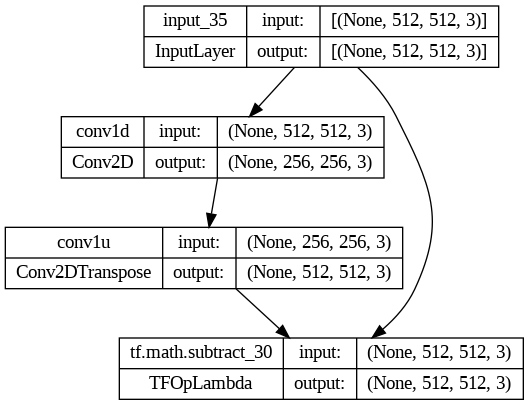

In [104]:
image = data.astronaut()
rows, cols, dim = image.shape


COL=3
rows, cols, dim = image.shape

inp = tf.keras.layers.Input(shape=(rows, cols, COL))
x1 = tf.keras.layers.Conv2D(filters=COL, kernel_size=(3, 3), name='conv1d', padding='same', use_bias=False, strides=(2,2))(inp)
x2 = tf.keras.layers.Conv2DTranspose(filters=COL, kernel_size=(3, 3), name='conv1u', padding='same', use_bias=False, strides=(2,2))(x1)

out=inp-x2

model_lapl=tf.keras.models.Model(inputs=inp, outputs=out)
model_lapl.compile()
tf.keras.utils.plot_model(model_lapl, show_shapes=True)

In [103]:
def build_coefs(w_gauss,cols=1,filters=1):
 wcols=[]
 for c in range(cols):
  wcols.append(w_gauss)
 wcols=np.array(wcols)
 wcols=np.rollaxis(wcols,0,3)

 wfils=[]
 for f in range(filters):
  wfils.append(wcols)
 wfils=np.array(wfils)
 wfils=np.rollaxis(wfils,0,4)
 return wfils

(1, 512, 512, 3)
(1, 512, 512, 3)


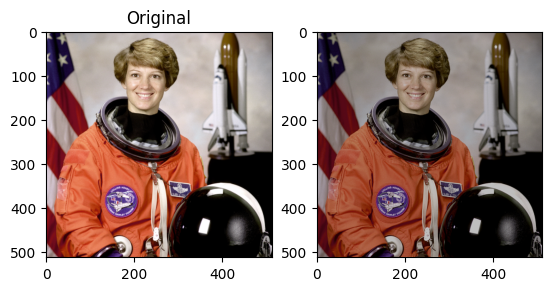

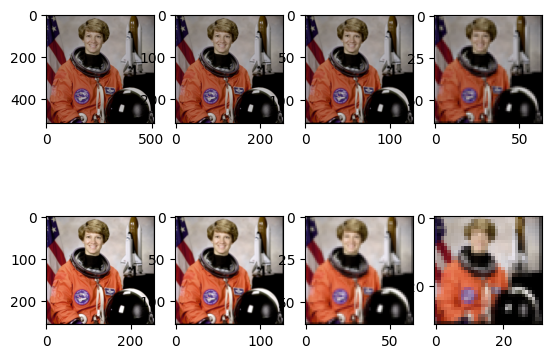

In [107]:
w_gauss = np.array([
    [1/16, 1/8, 1/16],
    [1/8, 1/4, 1/8],
    [1/16, 1/8, 1/16]
])


wout = build_coefs_3c(w_gauss)

model_lapl.get_layer('conv1d').set_weights([wout])
model_lapl.get_layer('conv1u').set_weights([wout])


print(np.expand_dims(image, axis=0).shape)
blur1s = model_lapl.predict(np.expand_dims(image, axis=0), verbose=False)

plt.subplot(121)
plt.title('Original')
plt.imshow(image)

plt.subplot(122)
plt.imshow(blur1s[0].astype(int))


c = inp
out = [1]*5
outg = [1]*5



for i in range(1, 5):
  x1 = tf.keras.layers.Conv2D(filters=COL, kernel_size=(3,3),
                              name='conv'+str(i)+'d', padding='same',
                              use_bias=False, activation='linear', strides=(2,2))(c)
  x2 = tf.keras.layers.Conv2DTranspose(filters=COL, kernel_size=(3,3),
                                       name='conv'+str(i)+'u', padding='same',
                                       use_bias=False, activation='linear',
                                       strides=(2,2))(x1)
  out[i] = c - x2
  outg[i] = x1
  c = x1

model_lapl = tf.keras.models.Model(inputs=inp, outputs=[out[1], out[2], out[3], out[4], outg[1], outg[2], outg[3], outg[4]])
model_lapl.compile()
tf.keras.utils.plot_model(model_lapl, show_shapes=True)


wout = build_coefs_3c(w_gauss)


model_lapl.get_layer('conv1d').set_weights([wout])
model_lapl.get_layer('conv1u').set_weights([wout])

model_lapl.get_layer('conv2d').set_weights([wout])
model_lapl.get_layer('conv2u').set_weights([wout])

model_lapl.get_layer('conv3d').set_weights([wout])
model_lapl.get_layer('conv3u').set_weights([wout])

model_lapl.get_layer('conv4d').set_weights([wout])
model_lapl.get_layer('conv4u').set_weights([wout])



print(np.expand_dims(image, axis=0).shape)
blur1s, blur2s, blur3s, blur4s, blur5s, blur6s, blur7s, blur8s = model_lapl.predict(np.expand_dims(image, axis=0), verbose=False)


fig,axs=plt.subplots(2,4)
axs[0,0].imshow(blur1s[0].astype(int))
axs[0,1].imshow(blur2s[0].astype(int))
axs[0,2].imshow(blur3s[0].astype(int))
axs[0,3].imshow(blur4s[0].astype(int))

axs[1,0].imshow(blur5s[0].astype(int))
axs[1,1].imshow(blur6s[0].astype(int))
axs[1,2].imshow(blur7s[0].astype(int))
axs[1,3].imshow(blur8s[0].astype(int))


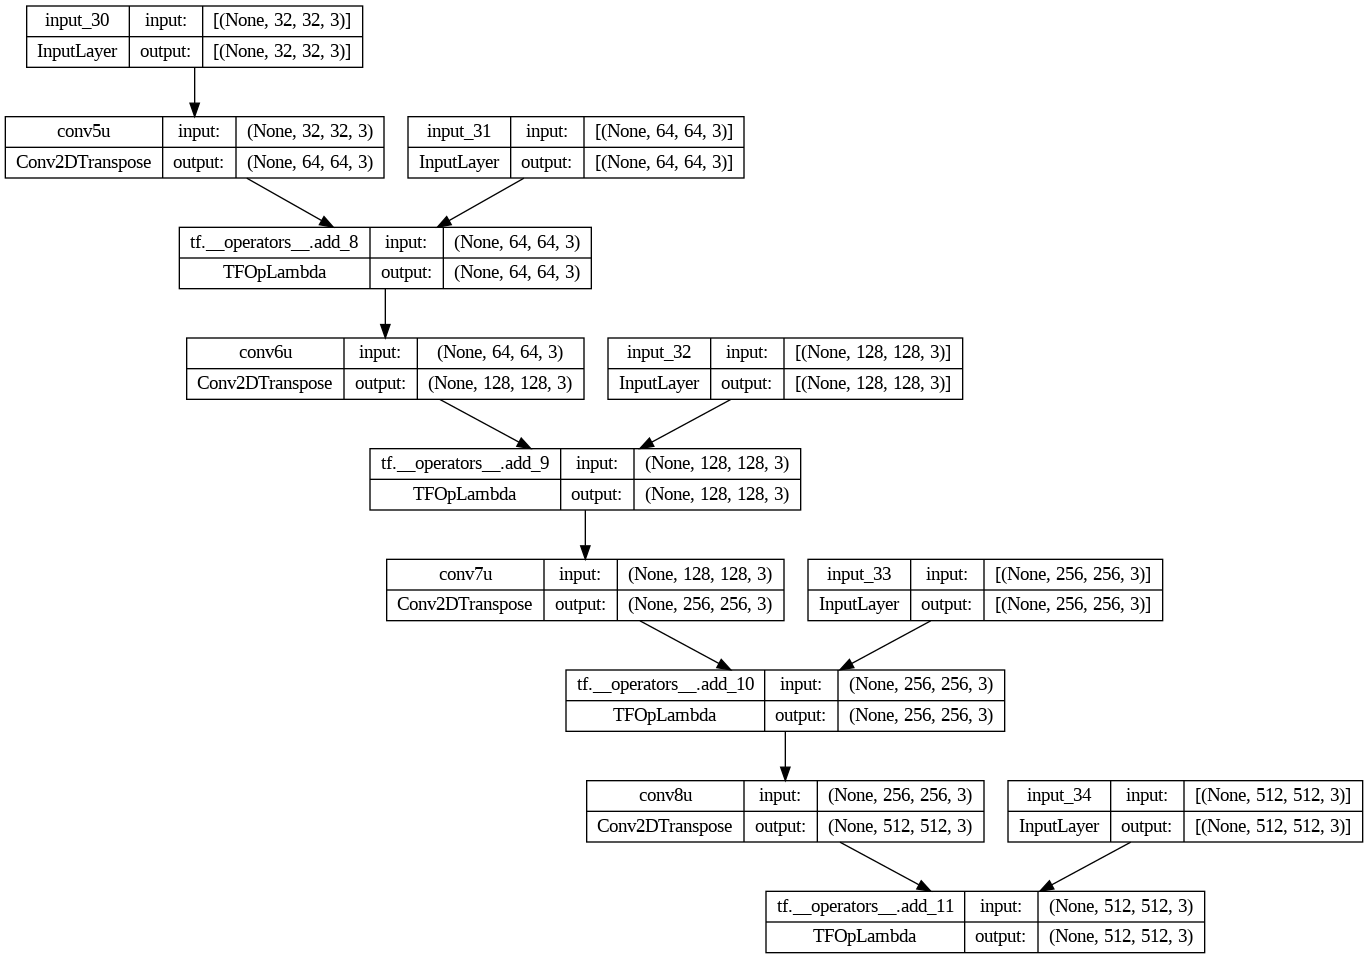

In [97]:
COL = 3
rows2 = rows//16
cols2=cols//16

inp = tf.keras.layers.Input(shape=(rows2, cols2, COL))
out = [0]*5

for i in range(4, 0, -1):
  out[i] = tf.keras.layers.Input(shape=(rows2*(2**(5-i)), cols2*(2**(5-i)),COL))

y = inp

for j, i in enumerate(range(4,0,-1)):
  y=tf.keras.layers.Conv2DTranspose(filters=COL, kernel_size=(3,3),
                                    name='conv'+str(j+5) +'u', padding='same',
                                    use_bias=False, activation='linear',
                                    strides=(2,2))(y)+out[i]

model_lapl_ups = tf.keras.models.Model(inputs=[inp, out[4], out[3], out[2], out[1]], outputs=[y])
model_lapl_ups.compile()
tf.keras.utils.plot_model(model_lapl_ups, show_shapes=True)

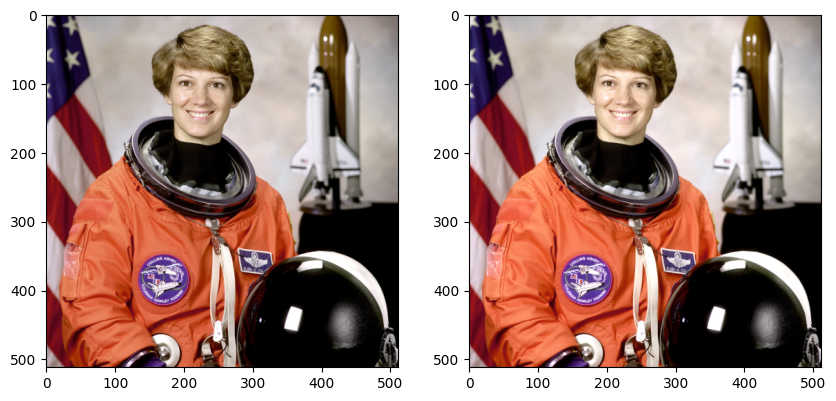

In [98]:

model_lapl_ups.get_layer('conv5u').set_weights([wout])
model_lapl_ups.get_layer('conv6u').set_weights([wout])
model_lapl_ups.get_layer('conv7u').set_weights([wout])
model_lapl_ups.get_layer('conv8u').set_weights([wout])


model_lapl_ups.get_layer('conv5u').set_weights([wout])
model_lapl_ups.get_layer('conv6u').set_weights([wout])
model_lapl_ups.get_layer('conv7u').set_weights([wout])
model_lapl_ups.get_layer('conv8u').set_weights([wout])

orig = model_lapl_ups.predict([np.expand_dims(blur8s[0], axis=0), np.expand_dims(blur7s[0], axis=0), np.expand_dims(blur6s[0], axis=0), np.expand_dims(blur5s[0], axis=0), np.expand_dims(blur1s[0], axis=0)], verbose=False)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(image)
axs[1].imshow(orig[0].astype(int))

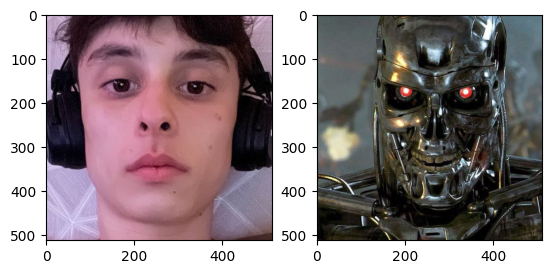

In [45]:
A = mpimg.imread('Egorik.jpg')[300:812, 190:702]
B = mpimg.imread('terminator.jpg')

fig, axs = plt.subplots(1,2)
axs[0].imshow(A)
axs[1].imshow(B)

In [99]:
blura = [1]*6
blurb = [1]*6

blura[1], blura[2], blura[3], blura[4], a, a, a, blura[5] = model_lapl.predict(
    np.expand_dims(A, axis=0), verbose=False
)

blurb[1], blurb[2], blurb[3], blurb[4], a, a, a, blurb[5] = model_lapl.predict(
    np.expand_dims(B, axis=0), verbose=False
)

In [58]:
mask=[0]*9
mask[8]=np.ones(shape=(1,4*2,4,3))
mask[8][:,:,:2,:]=0
for i in range(7,0,-1):
    mask[i]=upsample_and_smooth(mask[i+1])
for i in range(5,0,-1):
 mask[i]=cut_mask(mask[i])

1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 78ms/step


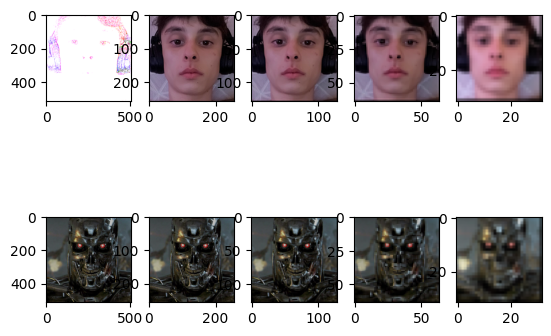

In [59]:
fig,axs=plt.subplots(2,5)
axs[0,0].imshow(blura[1][0])
axs[0,1].imshow(blura[2][0].astype(int))
axs[0,2].imshow(blura[3][0].astype(int))
axs[0,3].imshow(blura[4][0].astype(int))
axs[0,4].imshow(blura[5][0].astype(int))

axs[1,0].imshow(blurb[1][0].astype(int))
axs[1,1].imshow(blurb[2][0].astype(int))
axs[1,2].imshow(blurb[3][0].astype(int))
axs[1,3].imshow(blurb[4][0].astype(int))
axs[1,4].imshow(blurb[5][0].astype(int))

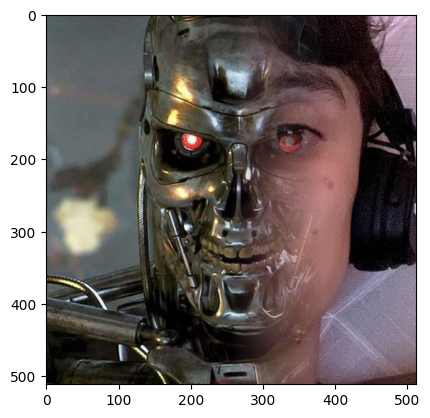

In [60]:
blur = [0]*6
for i in range(5,0,-1):
  blur[i] = blura[i]*mask[i] + blurb[i]*(1-mask[i])


y = model_lapl_ups.predict([blur[5],blur[4],blur[3],blur[2],blur[1]], verbose=False)
plt.imshow(y[0].astype(int))